##### Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster


#### Dataset 

In [2]:
# Load dataset
df = pd.read_csv("Mall_Customers_datasets.csv")
df.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


#### Exploratory Data Analysis (EDA)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


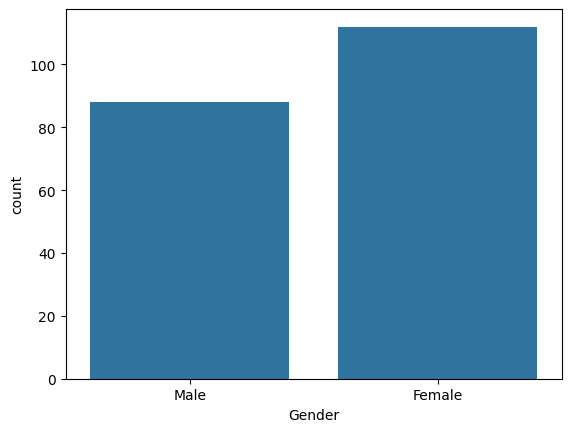

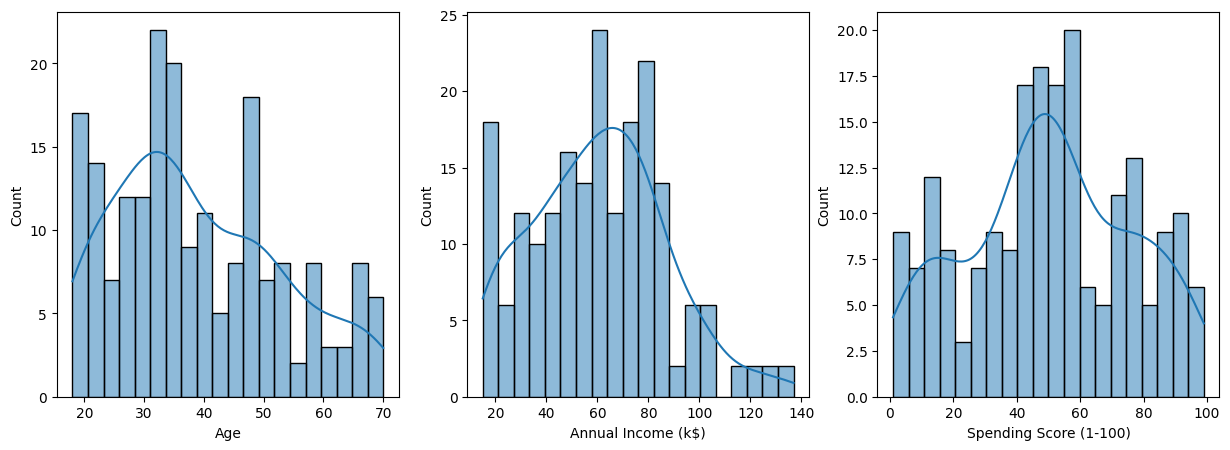

In [5]:
df.info()
df.describe()

# Gender distribution
sns.countplot(data=df, x="Gender")

# Age, Income, Spending Score distribution
fig, axs = plt.subplots(1, 3, figsize=(15,5))
sns.histplot(df['Age'], bins=20, kde=True, ax=axs[0])
sns.histplot(df['Annual Income (k$)'], bins=20, kde=True, ax=axs[1])
sns.histplot(df['Spending Score (1-100)'], bins=20, kde=True, ax=axs[2])
plt.show()


#### Feature Selection & Scaling

In [7]:
X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


####

#### Clustering By K-Means

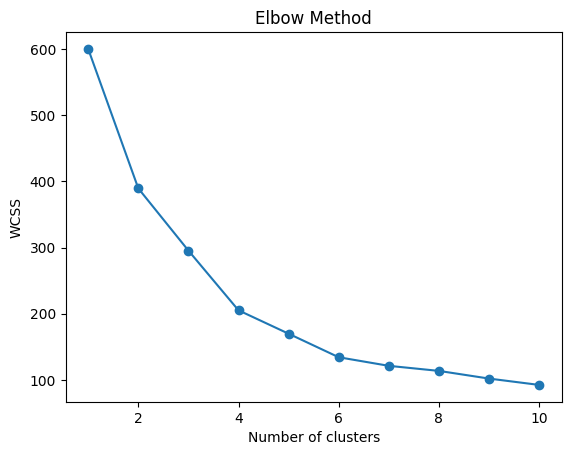

In [8]:
#  Find optimal clusters (Elbow method)
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11), wcss, marker='o')
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.title("Elbow Method")
plt.show()


In [10]:
# Fit model with optimal k (say k=5)
kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)


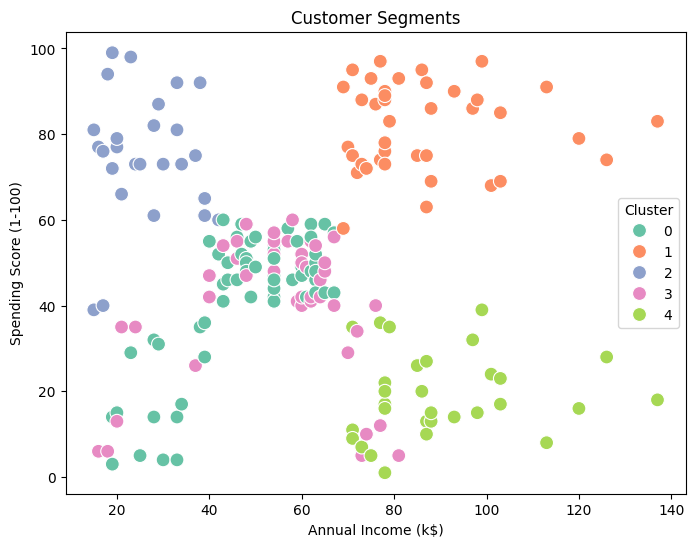

In [11]:
# Visualize clusters
plt.figure(figsize=(8,6))
sns.scatterplot(x=df['Annual Income (k$)'], 
                y=df['Spending Score (1-100)'], 
                hue=df['Cluster'], 
                palette="Set2", s=100)
plt.title("Customer Segments")
plt.show()


#### Hierarchical Clustering

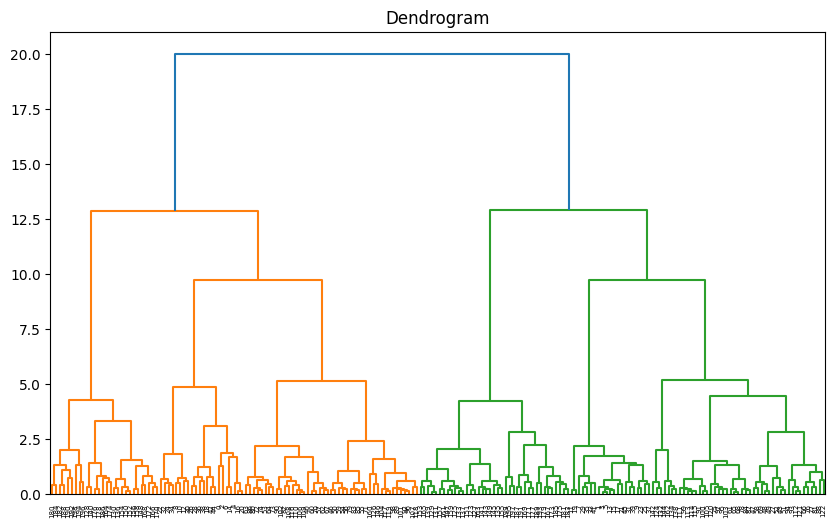

In [12]:
linked = linkage(X_scaled, method='ward')
plt.figure(figsize=(10,6))
dendrogram(linked)
plt.title("Dendrogram")
plt.show()

# Assuming 5 clusters
clusters = fcluster(linked, 5, criterion='maxclust')
df['Cluster_HC'] = clusters


#### Business Insights

- Each cluster represents a customer persona. Example from 5 clusters:
- High Income – High Spending → Target for premium products, loyalty programs.
- High Income – Low Spending → Upsell strategies, improve engagement.
- Low Income – High Spending → Value seekers, budget deals.
- Young – Moderate Spending → Growth potential, trend-driven marketing.
- Older – Low Spending → Retention strategies, basic services.